In [48]:
import pandas as pd
import numpy as np
import warnings

## Data pre-processing

In [49]:
df = pd.read_csv('data.csv', sep = ';')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [50]:
# Check data types
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [51]:
# Check for Na, Null
for col in df.columns:
    print(col)
    print('Na',df[col].isna().sum())
    print('Null',df[col].isnull().sum())
    print('-'*10)

Marital status
Na 0
Null 0
----------
Application mode
Na 0
Null 0
----------
Application order
Na 0
Null 0
----------
Course
Na 0
Null 0
----------
Daytime/evening attendance	
Na 0
Null 0
----------
Previous qualification
Na 0
Null 0
----------
Previous qualification (grade)
Na 0
Null 0
----------
Nacionality
Na 0
Null 0
----------
Mother's qualification
Na 0
Null 0
----------
Father's qualification
Na 0
Null 0
----------
Mother's occupation
Na 0
Null 0
----------
Father's occupation
Na 0
Null 0
----------
Admission grade
Na 0
Null 0
----------
Displaced
Na 0
Null 0
----------
Educational special needs
Na 0
Null 0
----------
Debtor
Na 0
Null 0
----------
Tuition fees up to date
Na 0
Null 0
----------
Gender
Na 0
Null 0
----------
Scholarship holder
Na 0
Null 0
----------
Age at enrollment
Na 0
Null 0
----------
International
Na 0
Null 0
----------
Curricular units 1st sem (credited)
Na 0
Null 0
----------
Curricular units 1st sem (enrolled)
Na 0
Null 0
----------
Curricular units 1st 

In [52]:
#Get continuous
continuous_features = []
for col in df.columns:
    if df[col].dtype == 'float64':
        continuous_features.append(col)

print(len(continuous_features))
continuous_features


7


['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [53]:
# Normalizing data

normalized_data = df.copy()

for col in continuous_features:
    normalized_data[col] = normalized_data[col] - normalized_data[col].mean() / normalized_data[col].std()

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,111.944648,1,19,12,...,0,0,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
1,1,15,1,9254,1,1,149.944648,1,1,3,...,0,6,6,6,11.703400,0,9.558112,-1.188132,0.789133,Graduate
2,1,1,5,9070,1,1,111.944648,1,37,37,...,0,6,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
3,1,17,2,9773,1,1,111.944648,1,38,37,...,0,6,10,5,10.436733,0,5.058112,-1.688132,-3.120867,Graduate
4,2,39,1,8014,0,1,89.944648,1,37,38,...,0,6,6,6,11.036733,0,9.558112,-1.188132,0.789133,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,114.944648,1,1,1,...,0,6,8,5,10.703400,0,11.158112,1.911868,-4.060867,Graduate
4420,1,1,2,9773,1,1,109.944648,105,1,1,...,0,6,6,2,9.036733,0,6.758112,-0.288132,2.019133,Dropout
4421,1,1,1,9500,1,1,143.944648,1,37,37,...,0,8,9,1,11.536733,0,9.558112,-1.188132,0.789133,Dropout
4422,1,1,1,9147,1,1,169.944648,1,37,37,...,0,5,6,5,10.036733,0,5.058112,-1.688132,-3.120867,Graduate


In [54]:
# Numerical stability

# convert categorical data to interger
course_dict = {}
i = 0

for id in normalized_data['Course'].unique():
    course_dict.update({id : i})
    i += 1

def convert_coures_id(id: int) -> int:
    return course_dict[id]

normalized_data['Course'] = normalized_data['Course'].apply(convert_coures_id)

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,111.944648,1,19,12,...,0,0,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
1,1,15,1,1,1,1,149.944648,1,1,3,...,0,6,6,6,11.703400,0,9.558112,-1.188132,0.789133,Graduate
2,1,1,5,2,1,1,111.944648,1,37,37,...,0,6,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
3,1,17,2,3,1,1,111.944648,1,38,37,...,0,6,10,5,10.436733,0,5.058112,-1.688132,-3.120867,Graduate
4,2,39,1,4,0,1,89.944648,1,37,38,...,0,6,6,6,11.036733,0,9.558112,-1.188132,0.789133,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,114.944648,1,1,1,...,0,6,8,5,10.703400,0,11.158112,1.911868,-4.060867,Graduate
4420,1,1,2,3,1,1,109.944648,105,1,1,...,0,6,6,2,9.036733,0,6.758112,-0.288132,2.019133,Dropout
4421,1,1,1,6,1,1,143.944648,1,37,37,...,0,8,9,1,11.536733,0,9.558112,-1.188132,0.789133,Dropout
4422,1,1,1,13,1,1,169.944648,1,37,37,...,0,5,6,5,10.036733,0,5.058112,-1.688132,-3.120867,Graduate


In [55]:
# normalized_data.to_csv('pre-processed_data.csv', index= False)

In [56]:
# covert Target in to 2 classes (Dropout, Enroll -> 0; Graduate -> 1)
def convert_target(result : str) -> int:
    if (result == 'Dropout' or result == "Enroll"):
        return 0
    
    return 1

normalized_data['Target'] = normalized_data['Target'].apply(convert_target)

## Logistic regression model

In [57]:
class LogisticRegression:
    def __init__ (self, epoch : int, lr : float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.thelta = None
        self.loss = []

    def sigmoid(self, x : np.ndarray) -> np.ndarray:
        warnings.filterwarnings('ignore')
        return 1/(1 + np.exp(-x))
    
    def loss_function(self, y : np.ndarray, y_pre : np.ndarray) -> float:
        return -(y * np.log(y_pre + 1e-6) + (1-y)* np.log(1-y_pre + 1e-6)).mean()

    def accuracy(self, y : np.ndarray, y_pre : np.ndarray) -> float:
        return (1 - np.abs(y-y_pre)).mean()
    
    def fit(self, x : np.ndarray, y : np.ndarray) -> None:
        row = x.shape[0]
        col = x.shape[1]
        self.thelta = np.zeros((col,1))

        for e in range(self.epoch):
            y_pre = self.predict(x)
            diff = y_pre - y
            grad = 1/row * (x.T @ diff)
            self.thelta -= self.lr * grad
            self.loss.append(self.loss_function(y,y_pre))

    def predict(self, x : np.ndarray) -> np.ndarray:
        return self.sigmoid(x @ self.thelta)
        

In [58]:
# Split data into train and test set
data = normalized_data.to_numpy()

data_train, data_test = np.split(data, indices_or_sections=[int(0.8*data.shape[0])])

X_train = data_train[:,:36]
Y_train = data_train[:,36 : ]

X_test = data_test[:,:36]
Y_test = data_test[:,36 : ]

In [59]:
# Training
log_reg = LogisticRegression(1000, 0.0001)
log_reg.fit(X_train,Y_train)

In [60]:
# Evaluate model by using accuracy metric
predicted = log_reg.predict(X_test)
print('Accuracy: ',log_reg.accuracy(Y_test, predicted))

Accuracy:  0.6751218554060955


## Visualize the loss function of the training process.

In [61]:
import matplotlib.pyplot as plt

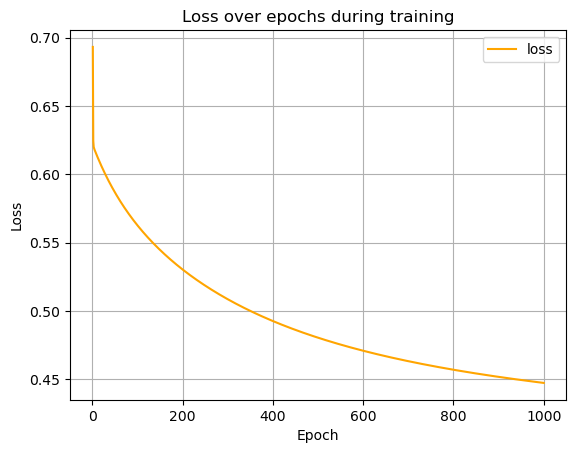

In [62]:
# Plot loss values recorded during training
plt.plot(list(range(1, log_reg.epoch+1)), log_reg.loss, color = 'orange' , label = 'loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Loss over epochs during training')
plt.legend()
plt.grid()
plt.show()